# Analysing Data: Assignment 1

### 1. Importing modules

In [243]:
import nltk
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
nltk.download('wordnet')
import spacy
from spacy import displacy
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#This 'Counter' function saves me from having to make one myself
from collections import Counter


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ajgre\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### 2. Reading files

In [355]:
#files should open correctly when cloning the github repository
with open('AD_Assignment_1_Aidan/text/01.txt', encoding='utf8') as infile:
     file_01 = infile.read()

with open('AD_Assignment_1_Aidan/text/02.txt', encoding='utf8') as infile:
     file_02 = infile.read()

with open('AD_Assignment_1_Aidan/text/03.txt', encoding='utf8') as infile:
     file_03 = infile.read()

with open('AD_Assignment_1_Aidan/text/04.txt', encoding='utf8') as infile:
     file_04 = infile.read()

with open('AD_Assignment_1_Aidan/text/05.txt', encoding='utf8') as infile:
     file_05 = infile.read()

with open('AD_Assignment_1_Aidan/text/English.txt', encoding='utf8') as infile:
     MT_English = infile.read()

with open('AD_Assignment_1_Aidan/text/Dutch.txt', encoding='utf8') as infile:
     MT_Dutch = infile.read()

with open('AD_Assignment_1_Aidan/text/German.txt', encoding='utf8') as infile:
     MT_German = infile.read()

### 3. Joining all 1+2 files into one

In [249]:
all_texts_list = [file_01, file_02, file_03, file_04, file_05]
joined_texts = '\n\n'.join(all_texts_list)

# Part 1:

### 1.1 Sentence and word tokenization

In [253]:
#function to clean text
def clean_text(tokens):
    punctuation = '!@#$%^&*()_-+={}[]:;"“’”\'|<>,.?/~`'
    cleaned_tokens = []
    for token in tokens:
        cleaned_token = ''.join(char for char in token if char not in punctuation)
        cleaned_token = cleaned_token.lower()
        if cleaned_token:
            cleaned_tokens.append(cleaned_token)
            
    return cleaned_tokens

In [255]:
#tokenized words
tokenized_words_01 = word_tokenize(file_01)
tokenized_words_02 = word_tokenize(file_02)
tokenized_words_03 = word_tokenize(file_03)
tokenized_words_04 = word_tokenize(file_04)
tokenized_words_05 = word_tokenize(file_05)
tokenized_words_all = word_tokenize(joined_texts)

#cleaned and tokenized words
clean_01 = clean_text(tokenized_words_01)
clean_02 = clean_text(tokenized_words_02)
clean_03 = clean_text(tokenized_words_03)
clean_04 = clean_text(tokenized_words_04)
clean_05 = clean_text(tokenized_words_05)
clean_all = clean_text(tokenized_words_all)

#For demonstration
print(clean_01)

['another', 'plot', 'bonesbard', 'missy', 'was', 'sitting', 'on', 'a', 'chair', 'in', 'a', 'house', 'maps', 'and', 'papers', 'spread', 'around', 'normally', 'her', 'planning', 'was', 'mental', 'but', 'river', 'had', 'suggested', 'a', 'physical', 'map', 'to', 'refer', 'to', 'and', 'it', 'was', 'helpful', 'river', 'walked', 'out', 'of', 'the', 'bedroom', 'the', 'people', 'who', 'own', 'this', 'house', 'really', 'have', 'no', 'good', 'clothes', 'she', 'was', 'wearing', 'a', 'tshirt', 'that', 'drenched', 'her', 'form', 'and', 'some', 'trousers', 'that', 'looked', 'about', 'the', 'right', 'size', 'missy', 'smiled', 'still', 'in', 'her', 'mary', 'poppins', 'looking', 'outfit', 'river', 'looked', 'over', 'at', 'the', 'maps', 'darling', 'wouldn', 't', 'it', 'be', 'better', 'to', 'start', 'there', 'she', 'pointed', 'at', 'a', 'place', 'on', 'the', 'map', 'it', 's', 'more', 'central', 'missy', 'smiles', 'and', 'leans', 'back', 'placing', 'a', 'kiss', 'on', 'river', 's', 'jaw', 'a', 'smile', 'on'

In [257]:
#tokenized sentences
sentences_01 = sent_tokenize(file_01)
sentences_02 = sent_tokenize(file_02)
sentences_03 = sent_tokenize(file_03)
sentences_04 = sent_tokenize(file_04)
sentences_05 = sent_tokenize(file_05)
sentences_all = sent_tokenize(joined_texts)

#For demonstration
print(sentences_01)

['Another plot?', 'Bones_Bard \n\n---\n\nMissy was sitting on a chair in a house, maps and papers spread around, normally her planning was mental, but River had suggested a physical map to refer to and it was helpful.', 'River walked out of the bedroom.', '“The people who own this house really have no good clothes.” She was wearing a t-shirt that drenched her form, and some trousers that looked about the right size, Missy smiled, still in her Mary Poppins looking outfit, River looked over at the maps.', '“Darling, wouldn’t it be better to start there?” She pointed at a place on the map.', '“It’s more central.” Missy smiles and leans back, placing a kiss on River’s jaw, a smile on her face, River reaches onto the table for a cup of coffee, gracefully sitting herself on the chair next to Missy, she raises the cups to her lips, wondering wether Missy had noticed yet.', '“That’s my cup!” River smiles, placing it down, Missy glares at her and River leans over to kiss her.', 'The maps are st

### 1.2 Statistics of word frequency (per story, and in total) in a dictionary

In [260]:
Counter(clean_01)

Counter({'the': 17,
         'her': 12,
         'river': 11,
         'missy': 10,
         'a': 10,
         'and': 9,
         'to': 8,
         'was': 7,
         'on': 7,
         'it': 6,
         'maps': 5,
         'she': 5,
         'at': 5,
         'that': 4,
         'over': 4,
         's': 4,
         'sitting': 3,
         'chair': 3,
         'had': 3,
         'placing': 3,
         'in': 2,
         'house': 2,
         'map': 2,
         'out': 2,
         'of': 2,
         'people': 2,
         'own': 2,
         'this': 2,
         'looked': 2,
         'smiled': 2,
         'still': 2,
         'place': 2,
         'smiles': 2,
         'leans': 2,
         'kiss': 2,
         'smile': 2,
         'table': 2,
         'cup': 2,
         'coffee': 2,
         'or': 2,
         'little': 2,
         'turned': 2,
         'another': 1,
         'plot': 1,
         'bonesbard': 1,
         'papers': 1,
         'spread': 1,
         'around': 1,
         'normally': 1

In [262]:
Counter(clean_02)

Counter({'she': 64,
         'her': 21,
         'the': 20,
         'him': 16,
         't': 15,
         'and': 14,
         'to': 13,
         'he': 13,
         'in': 12,
         'was': 12,
         'a': 11,
         'as': 11,
         'it': 9,
         'd': 8,
         'how': 8,
         'had': 8,
         'of': 7,
         'back': 6,
         'with': 6,
         'you': 5,
         'who': 5,
         'didn': 5,
         'but': 5,
         'wanted': 5,
         'me': 4,
         'come': 4,
         'hadn': 4,
         'be': 4,
         'when': 4,
         'smiled': 4,
         'been': 4,
         'on': 4,
         'for': 4,
         'looked': 3,
         'eyes': 3,
         'look': 3,
         'have': 3,
         'got': 3,
         'loved': 3,
         'day': 3,
         'just': 3,
         'used': 3,
         'wished': 3,
         'children': 3,
         'left': 3,
         'wasn': 3,
         'river': 3,
         'told': 2,
         'not': 2,
         'sat': 2,
         'here': 

In [264]:
Counter(clean_03)

Counter({'the': 80,
         'her': 59,
         'he': 56,
         'to': 55,
         'you': 50,
         'and': 47,
         'i': 38,
         'she': 38,
         'of': 32,
         'it': 32,
         'his': 30,
         'rose': 27,
         'was': 27,
         'a': 24,
         'd': 22,
         'doctor': 20,
         'but': 19,
         'not': 19,
         'that': 18,
         'in': 18,
         'with': 17,
         'him': 17,
         'nt': 16,
         'time': 15,
         'so': 14,
         'had': 13,
         'as': 12,
         'for': 12,
         'one': 10,
         'would': 10,
         'me': 10,
         'an': 10,
         'from': 9,
         'this': 9,
         'what': 9,
         'all': 9,
         'there': 9,
         'energy': 8,
         'just': 8,
         'vortex': 8,
         'when': 8,
         'no': 8,
         'did': 8,
         'long': 8,
         'now': 8,
         'could': 8,
         'they': 8,
         've': 8,
         'at': 8,
         'hand': 8,
         '

In [266]:
Counter(clean_04)

Counter({'the': 79,
         'to': 50,
         'he': 42,
         'was': 30,
         'doctor': 30,
         'she': 25,
         'her': 23,
         'that': 22,
         'and': 22,
         'rose': 21,
         'martha': 20,
         'a': 17,
         'of': 16,
         'had': 14,
         'for': 12,
         'his': 11,
         't': 11,
         'in': 11,
         'is': 10,
         'it': 10,
         's': 10,
         'tardis': 9,
         'with': 8,
         'how': 8,
         'could': 8,
         'do': 8,
         'up': 7,
         'about': 7,
         'didn': 7,
         'on': 7,
         'some': 7,
         'but': 7,
         'then': 6,
         'life': 6,
         'into': 6,
         'him': 6,
         'what': 6,
         'now': 6,
         'time': 5,
         'like': 5,
         'this': 5,
         '—': 5,
         'himself': 5,
         'translate': 5,
         'so': 5,
         'be': 5,
         'just': 5,
         'way': 4,
         'out': 4,
         'made': 4,
         'a

In [268]:
Counter(clean_05)

Counter({'you': 254,
         'the': 133,
         'your': 122,
         'to': 112,
         'and': 84,
         'she': 82,
         'her': 80,
         'a': 78,
         't': 52,
         'of': 52,
         'it': 50,
         'i': 46,
         'in': 45,
         'that': 43,
         'was': 39,
         'doctor': 31,
         'at': 30,
         'he': 30,
         'for': 27,
         'with': 26,
         'out': 26,
         's': 24,
         'but': 23,
         'on': 22,
         'were': 20,
         'so': 20,
         'as': 17,
         'if': 16,
         'be': 16,
         'when': 16,
         'have': 16,
         'not': 16,
         'his': 16,
         'eyes': 15,
         'up': 14,
         'back': 14,
         'could': 13,
         'didn': 13,
         'd': 12,
         'yet': 12,
         'like': 12,
         'him': 12,
         'm': 12,
         'time': 12,
         'from': 12,
         'what': 11,
         'would': 11,
         'or': 11,
         'about': 11,
         'no': 11,


In [270]:
Counter(clean_all)

Counter({'the': 329,
         'you': 310,
         'to': 238,
         'she': 214,
         'her': 195,
         'and': 176,
         'he': 141,
         'a': 140,
         'your': 122,
         'was': 115,
         'of': 109,
         'it': 107,
         'in': 88,
         'that': 88,
         'i': 84,
         't': 83,
         'doctor': 83,
         'his': 59,
         'with': 58,
         'for': 56,
         'but': 55,
         'him': 51,
         'rose': 48,
         'had': 47,
         's': 47,
         'on': 46,
         'at': 46,
         'd': 43,
         'so': 42,
         'as': 42,
         'not': 39,
         'out': 35,
         'be': 34,
         'time': 32,
         'when': 31,
         'could': 30,
         'up': 29,
         'back': 28,
         'were': 28,
         'what': 28,
         'how': 28,
         'this': 27,
         'have': 27,
         'do': 26,
         'from': 26,
         'didn': 25,
         'like': 25,
         'an': 24,
         'now': 24,
         'ey

### 1.3 Plot the 25 most common words as a histogram per text, and with all

In [273]:
#defining a function for the 25 most frequent words
def top25words(text, title = 'something'):
    word_counts = Counter(text)
    top_25 = word_counts.most_common(25)

    word_dict = dict(top_25)
    words = list(word_dict.keys())
    counts = list(word_dict.values())

    plt.figure(figsize=(12, 6))
    plt.bar(words, counts, color='red') 
    plt.xticks(rotation=30)  
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Top 25 Most Frequent Words in {title}')
    plt.show()

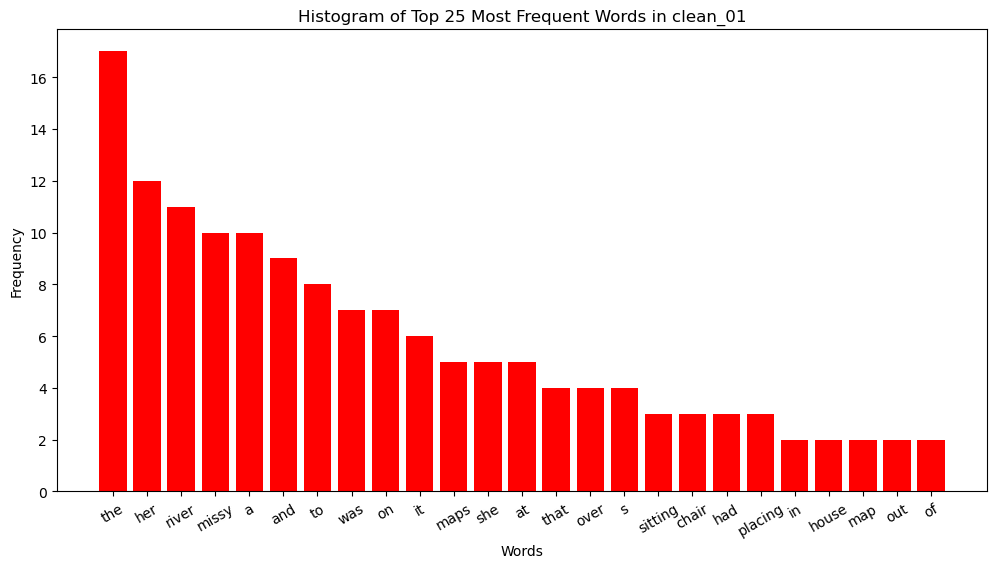

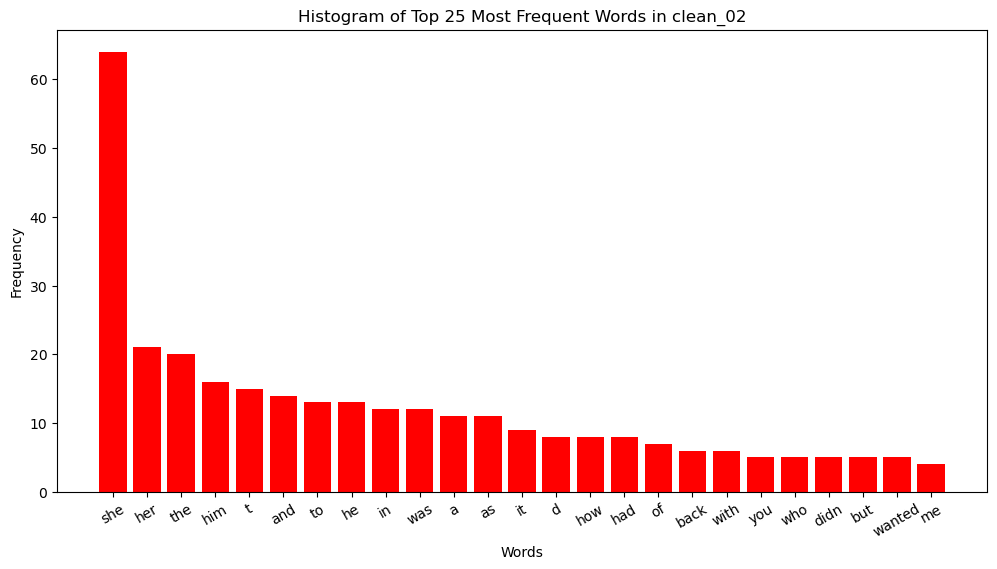

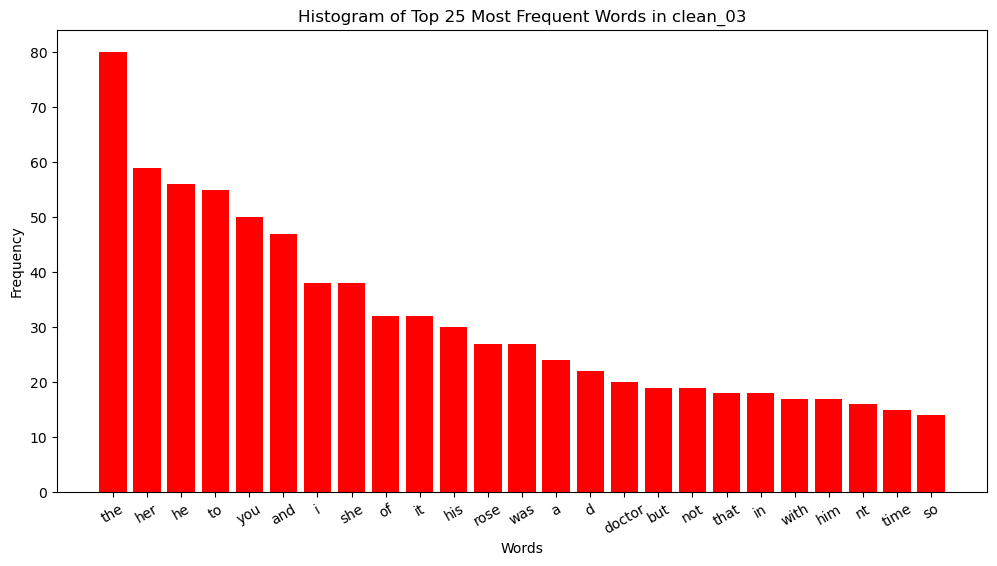

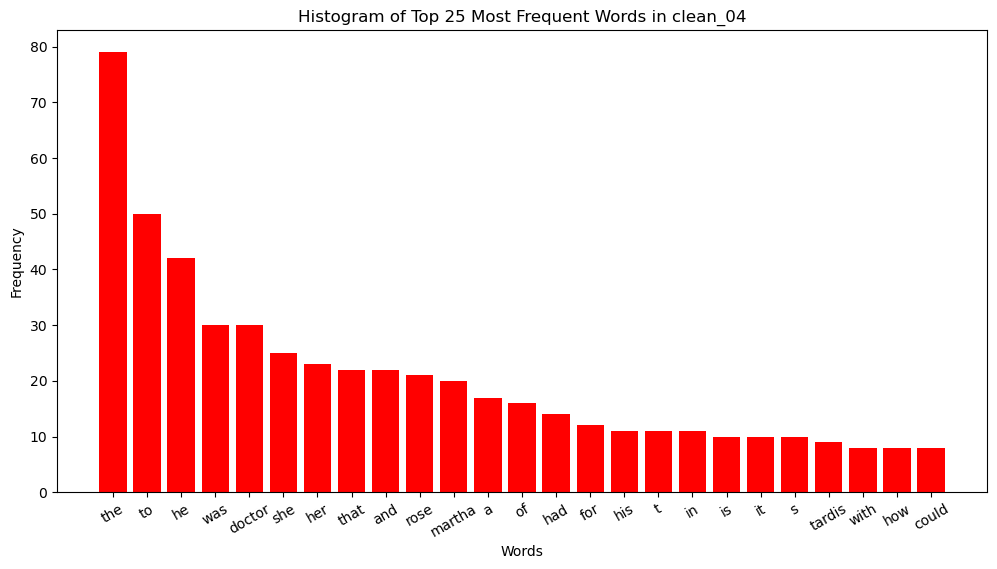

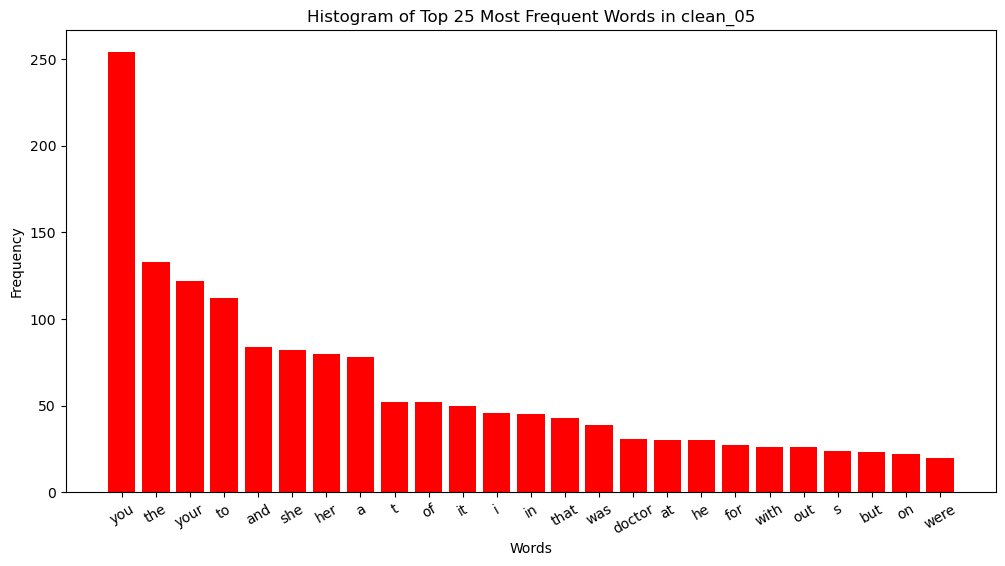

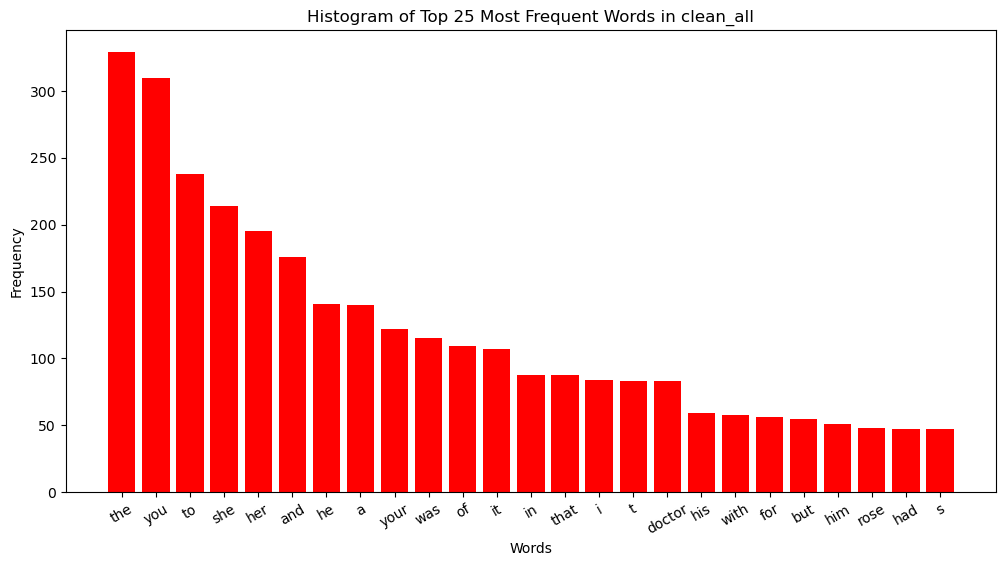

In [275]:
top25words(clean_01, title='clean_01')
top25words(clean_02, title='clean_02')
top25words(clean_03, title='clean_03')
top25words(clean_04, title='clean_04')
top25words(clean_05, title='clean_05')
top25words(clean_all, title='clean_all')

### 2.1 Using the Porter Stemmer on the texts

In [277]:
#assigning a variable
P_stemmer = PorterStemmer()

#stemmed words variables
P_stemmed_01 = [P_stemmer.stem(word) for word in clean_01]
P_stemmed_02 = [P_stemmer.stem(word) for word in clean_02]
P_stemmed_03 = [P_stemmer.stem(word) for word in clean_03]
P_stemmed_04 = [P_stemmer.stem(word) for word in clean_04]
P_stemmed_05 = [P_stemmer.stem(word) for word in clean_05]
P_stemmed_all = [P_stemmer.stem(word) for word in clean_all]

In [278]:
#counter of stemmed-word frequency
Counter(P_stemmed_01)

Counter({'the': 17,
         'her': 12,
         'river': 11,
         'missi': 10,
         'a': 10,
         'and': 9,
         'to': 8,
         'wa': 7,
         'on': 7,
         'map': 7,
         'it': 6,
         'smile': 6,
         'she': 5,
         'look': 5,
         'at': 5,
         'place': 5,
         'that': 4,
         'over': 4,
         's': 4,
         'sit': 3,
         'chair': 3,
         'had': 3,
         'cup': 3,
         'in': 2,
         'hous': 2,
         'normal': 2,
         'out': 2,
         'of': 2,
         'peopl': 2,
         'own': 2,
         'thi': 2,
         'still': 2,
         'point': 2,
         'lean': 2,
         'kiss': 2,
         'tabl': 2,
         'coffe': 2,
         'bit': 2,
         'or': 2,
         'littl': 2,
         'turn': 2,
         'anoth': 1,
         'plot': 1,
         'bonesbard': 1,
         'paper': 1,
         'spread': 1,
         'around': 1,
         'plan': 1,
         'mental': 1,
         'but': 1,
     

In [279]:
Counter(P_stemmed_02)

Counter({'she': 64,
         'her': 21,
         'the': 20,
         'him': 16,
         't': 15,
         'and': 14,
         'to': 13,
         'he': 13,
         'in': 12,
         'wa': 12,
         'a': 11,
         'as': 11,
         'it': 9,
         'd': 8,
         'how': 8,
         'had': 8,
         'want': 7,
         'of': 7,
         'look': 6,
         'back': 6,
         'with': 6,
         'you': 5,
         'come': 5,
         'who': 5,
         'didn': 5,
         'be': 5,
         'but': 5,
         'smile': 5,
         'me': 4,
         'love': 4,
         'hadn': 4,
         'when': 4,
         'been': 4,
         'on': 4,
         'for': 4,
         'eye': 3,
         'have': 3,
         'got': 3,
         'know': 3,
         'day': 3,
         'just': 3,
         'use': 3,
         'wish': 3,
         'children': 3,
         'left': 3,
         'wasn': 3,
         'river': 3,
         'adventur': 3,
         'wait': 3,
         'told': 2,
         'not': 2,
   

In [280]:
Counter(P_stemmed_03)

Counter({'the': 80,
         'her': 60,
         'he': 56,
         'to': 55,
         'you': 50,
         'and': 47,
         'i': 38,
         'she': 38,
         'of': 32,
         'it': 32,
         'hi': 30,
         'rose': 27,
         'wa': 27,
         'a': 24,
         'd': 22,
         'doctor': 20,
         'but': 19,
         'not': 19,
         'that': 18,
         'in': 18,
         'with': 17,
         'him': 17,
         'nt': 16,
         'time': 16,
         'so': 14,
         'had': 13,
         'want': 12,
         'as': 12,
         'for': 12,
         'face': 11,
         'one': 10,
         'would': 10,
         'me': 10,
         'hand': 10,
         'an': 10,
         'long': 9,
         'from': 9,
         'thi': 9,
         'what': 9,
         'all': 9,
         'be': 9,
         'there': 9,
         'regener': 8,
         'energi': 8,
         'just': 8,
         'vortex': 8,
         'when': 8,
         'no': 8,
         'did': 8,
         'now': 8,
      

In [281]:
Counter(P_stemmed_04)

Counter({'the': 79,
         'to': 50,
         'he': 42,
         'wa': 30,
         'doctor': 30,
         'she': 25,
         'her': 24,
         'rose': 22,
         'that': 22,
         'and': 22,
         'martha': 20,
         'a': 17,
         'of': 16,
         'had': 14,
         'for': 12,
         'hi': 11,
         't': 11,
         'in': 11,
         'is': 10,
         'it': 10,
         's': 10,
         'do': 9,
         'tardi': 9,
         'with': 8,
         'how': 8,
         'could': 8,
         'up': 7,
         'about': 7,
         'didn': 7,
         'on': 7,
         'some': 7,
         'but': 7,
         'then': 6,
         'life': 6,
         'into': 6,
         'him': 6,
         'what': 6,
         'now': 6,
         'translat': 6,
         'smile': 5,
         'time': 5,
         'like': 5,
         'thi': 5,
         '—': 5,
         'himself': 5,
         'so': 5,
         'be': 5,
         'just': 5,
         'joy': 4,
         'way': 4,
         'out':

In [282]:
Counter(P_stemmed_05)

Counter({'you': 254,
         'the': 133,
         'your': 124,
         'to': 112,
         'and': 84,
         'she': 82,
         'her': 81,
         'a': 78,
         'it': 52,
         't': 52,
         'of': 52,
         'i': 46,
         'in': 45,
         'that': 43,
         'wa': 39,
         'doctor': 31,
         'at': 30,
         'he': 30,
         'for': 27,
         'with': 26,
         'out': 26,
         's': 24,
         'but': 23,
         'on': 22,
         'were': 20,
         'so': 20,
         'be': 19,
         'eye': 19,
         'as': 17,
         'if': 16,
         'when': 16,
         'have': 16,
         'not': 16,
         'hi': 16,
         'time': 15,
         'up': 14,
         'back': 14,
         'could': 13,
         'like': 13,
         'didn': 13,
         'hand': 13,
         'd': 12,
         'yet': 12,
         'him': 12,
         'm': 12,
         'from': 12,
         'what': 11,
         'would': 11,
         'do': 11,
         'or': 11,
    

In [284]:
Counter(P_stemmed_all)

Counter({'the': 329,
         'you': 310,
         'to': 238,
         'she': 214,
         'her': 198,
         'and': 176,
         'he': 141,
         'a': 140,
         'your': 124,
         'wa': 115,
         'it': 109,
         'of': 109,
         'in': 88,
         'that': 88,
         'i': 84,
         't': 83,
         'doctor': 83,
         'hi': 59,
         'with': 58,
         'for': 56,
         'but': 55,
         'him': 51,
         'rose': 49,
         'had': 47,
         's': 47,
         'on': 46,
         'at': 46,
         'd': 43,
         'so': 42,
         'as': 42,
         'be': 39,
         'not': 39,
         'time': 36,
         'out': 35,
         'when': 31,
         'could': 30,
         'have': 29,
         'back': 29,
         'up': 29,
         'smile': 28,
         'were': 28,
         'what': 28,
         'do': 28,
         'eye': 28,
         'how': 28,
         'thi': 27,
         'from': 26,
         'like': 26,
         'look': 25,
         'ha

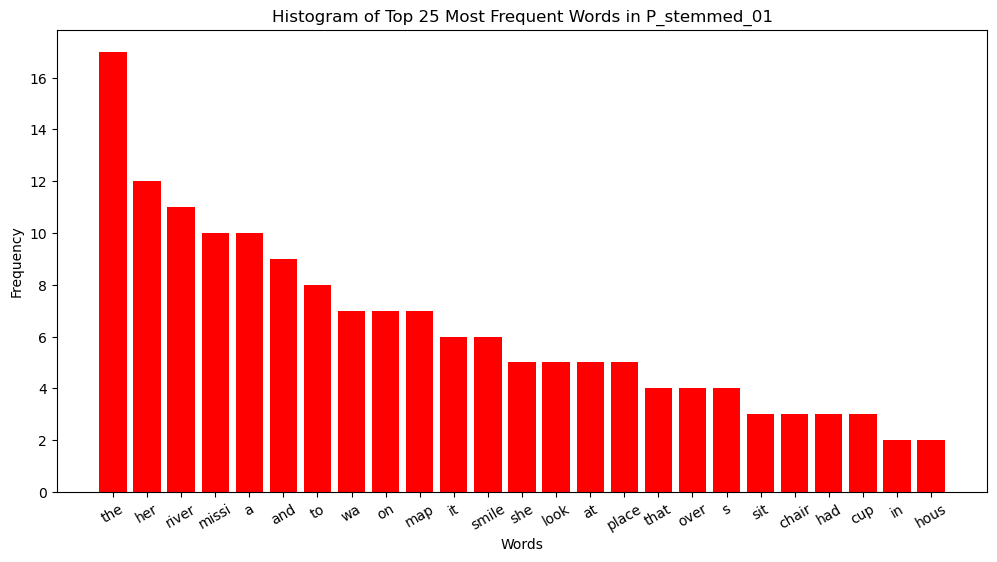

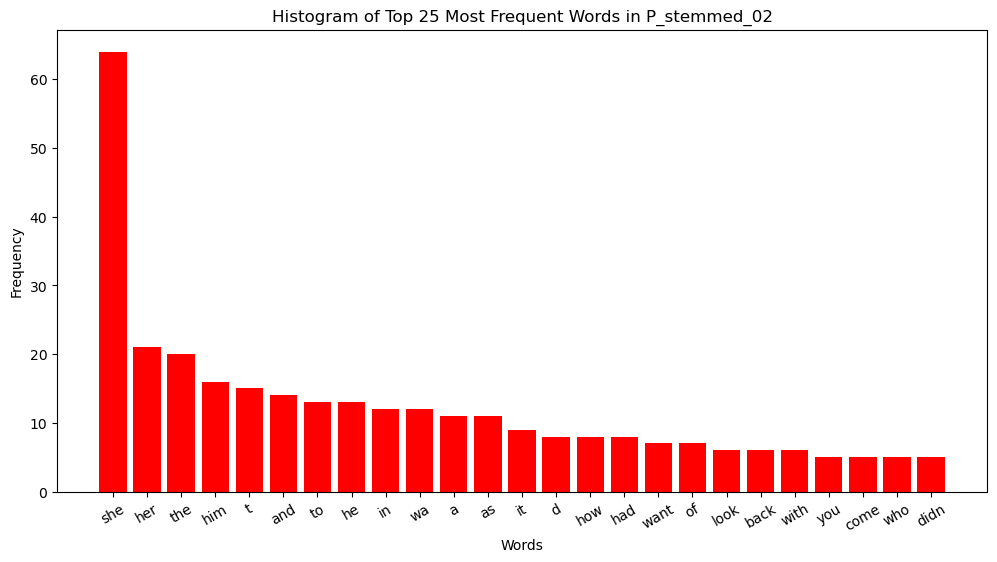

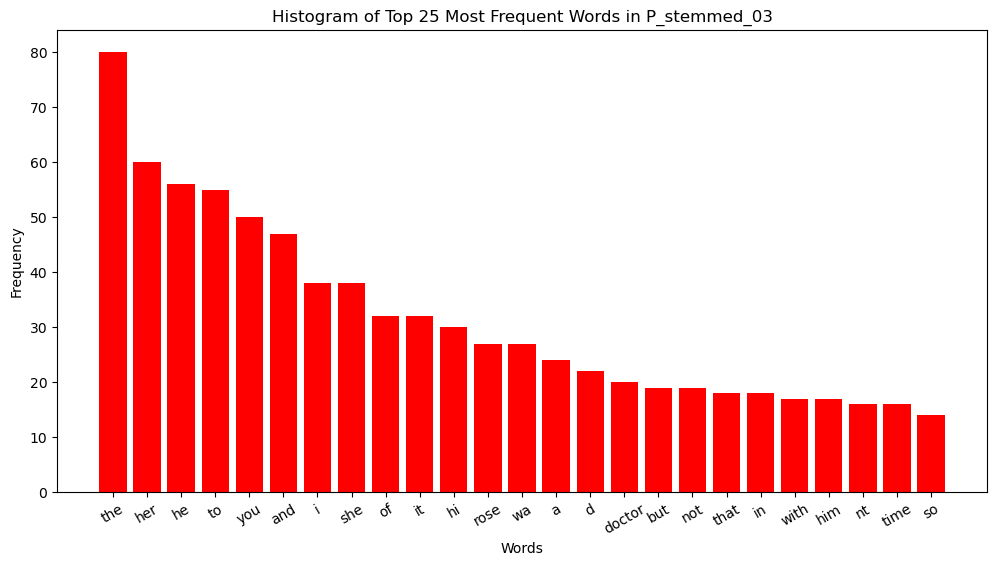

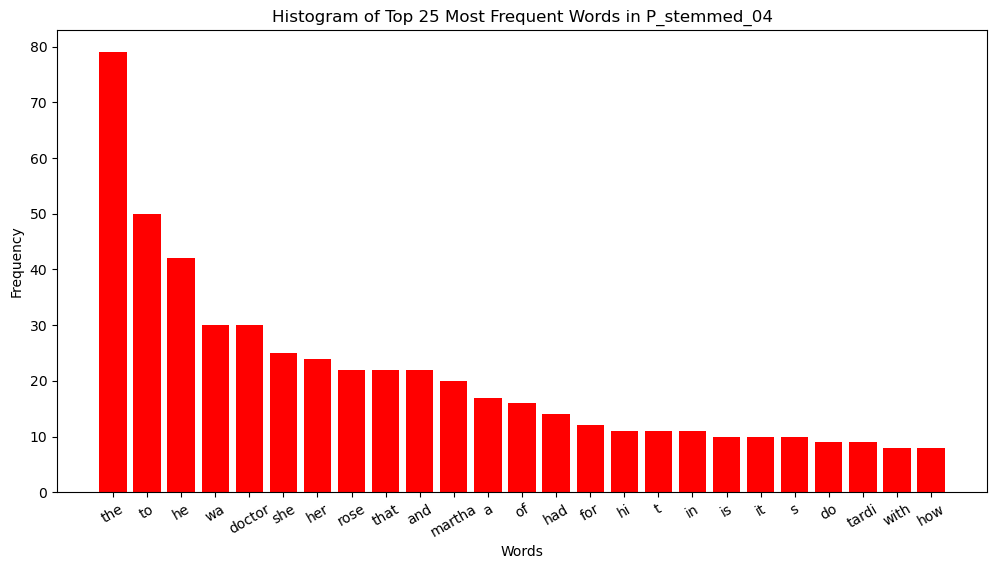

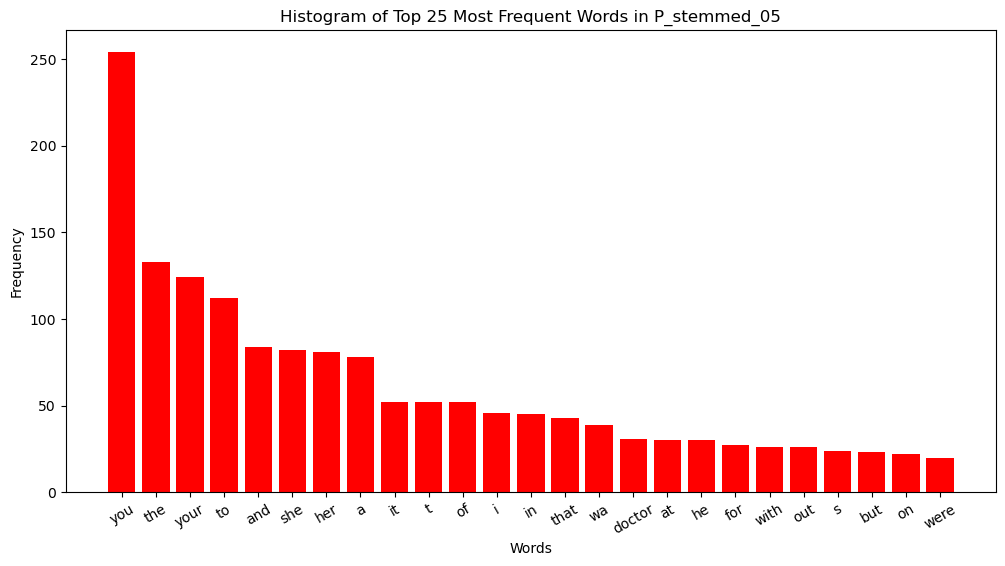

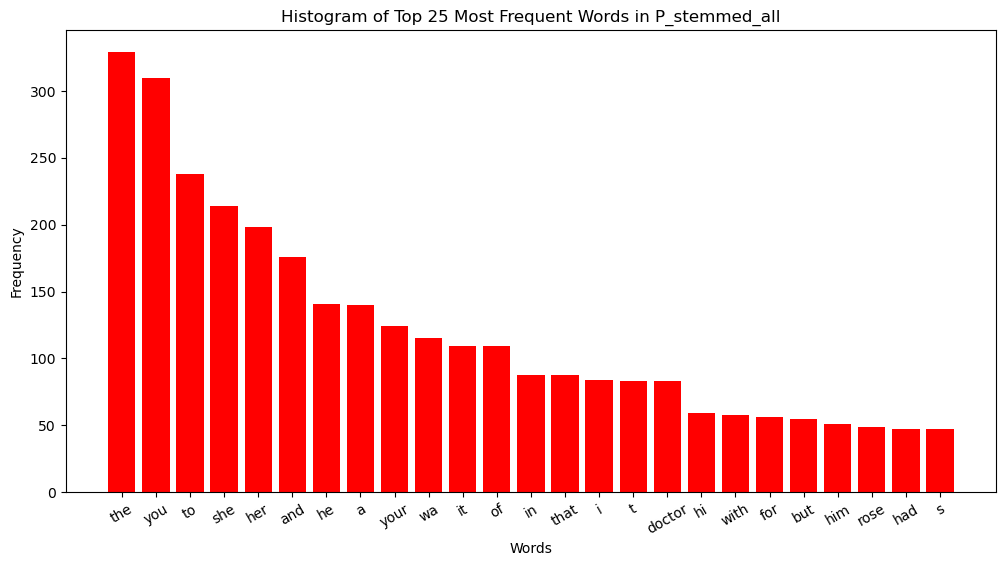

In [287]:
#using function from earlier to create these histograms
top25words(P_stemmed_01, title='P_stemmed_01')
top25words(P_stemmed_02, title='P_stemmed_02')
top25words(P_stemmed_03, title='P_stemmed_03')
top25words(P_stemmed_04, title='P_stemmed_04')
top25words(P_stemmed_05, title='P_stemmed_05')
top25words(P_stemmed_all, title='P_stemmed_all')

### 2.2 Using the Lancaster Stemmer on the texts

In [294]:
#assigning it a variable
L_stemmer = LancasterStemmer()

#stemmed words variables
L_stemmed_01 = [L_stemmer.stem(word) for word in clean_01]
L_stemmed_02 = [L_stemmer.stem(word) for word in clean_02]
L_stemmed_03 = [L_stemmer.stem(word) for word in clean_03]
L_stemmed_04 = [L_stemmer.stem(word) for word in clean_04]
L_stemmed_05 = [L_stemmer.stem(word) for word in clean_05]
L_stemmed_all = [L_stemmer.stem(word) for word in clean_all]

In [295]:
#counter of stemmed-word frequency
Counter(L_stemmed_01)

Counter({'the': 17,
         'her': 12,
         'riv': 11,
         'missy': 10,
         'a': 10,
         'and': 9,
         'to': 8,
         'was': 7,
         'on': 7,
         'map': 7,
         'it': 6,
         'smil': 6,
         'she': 5,
         'look': 5,
         'at': 5,
         'plac': 5,
         'that': 4,
         'ov': 4,
         's': 4,
         'sit': 3,
         'chair': 3,
         'had': 3,
         'cup': 3,
         'in': 2,
         'hous': 2,
         'norm': 2,
         'out': 2,
         'of': 2,
         'peopl': 2,
         'own': 2,
         'thi': 2,
         'stil': 2,
         'point': 2,
         'lean': 2,
         'kiss': 2,
         'tabl': 2,
         'coff': 2,
         'bit': 2,
         'or': 2,
         'littl': 2,
         'turn': 2,
         'anoth': 1,
         'plot': 1,
         'bonesbard': 1,
         'pap': 1,
         'spread': 1,
         'around': 1,
         'plan': 1,
         'ment': 1,
         'but': 1,
         'suggest'

In [296]:
Counter(L_stemmed_02)

Counter({'she': 64,
         'her': 23,
         'the': 20,
         'him': 16,
         't': 15,
         'and': 14,
         'to': 13,
         'he': 13,
         'in': 12,
         'was': 12,
         'a': 11,
         'as': 11,
         'it': 9,
         'd': 8,
         'how': 8,
         'had': 8,
         'want': 7,
         'on': 7,
         'of': 7,
         'look': 6,
         'back': 6,
         'with': 6,
         'you': 5,
         'com': 5,
         'who': 5,
         'didn': 5,
         'but': 5,
         'smil': 5,
         'me': 4,
         'got': 4,
         'lov': 4,
         'hadn': 4,
         'be': 4,
         'when': 4,
         'been': 4,
         'for': 4,
         'ey': 3,
         'hav': 3,
         'know': 3,
         'day': 3,
         'ev': 3,
         'just': 3,
         'us': 3,
         'wish': 3,
         'childr': 3,
         'left': 3,
         'wasn': 3,
         'riv': 3,
         'adv': 3,
         'wait': 3,
         'told': 2,
         'not': 2,

In [298]:
Counter(L_stemmed_03)

Counter({'the': 80,
         'her': 60,
         'he': 56,
         'to': 55,
         'you': 50,
         'and': 47,
         'i': 38,
         'she': 38,
         'of': 32,
         'it': 32,
         'his': 30,
         'ros': 27,
         'was': 27,
         'a': 24,
         'd': 22,
         'doct': 20,
         'on': 20,
         'but': 19,
         'not': 19,
         'that': 18,
         'in': 18,
         'with': 17,
         'him': 17,
         'nt': 16,
         'tim': 16,
         'so': 14,
         'had': 13,
         'want': 12,
         'as': 12,
         'for': 12,
         'long': 11,
         'fac': 11,
         'would': 10,
         'me': 10,
         'hand': 10,
         'an': 10,
         'ev': 9,
         'reg': 9,
         'from': 9,
         'thi': 9,
         'what': 9,
         'al': 9,
         'ther': 9,
         'energy': 8,
         'just': 8,
         'vortex': 8,
         'when': 8,
         'no': 8,
         'did': 8,
         'now': 8,
         'could

In [303]:
Counter(L_stemmed_04)

Counter({'the': 79,
         'to': 50,
         'he': 42,
         'was': 30,
         'doct': 30,
         'she': 25,
         'her': 25,
         'ros': 22,
         'that': 22,
         'and': 22,
         'marth': 20,
         'a': 17,
         'of': 16,
         'had': 14,
         'for': 12,
         'his': 11,
         't': 11,
         'in': 11,
         'is': 10,
         'it': 10,
         's': 10,
         'on': 10,
         'tard': 9,
         'with': 8,
         'how': 8,
         'could': 8,
         'do': 8,
         'up': 7,
         'about': 7,
         'didn': 7,
         'som': 7,
         'but': 7,
         'then': 6,
         'lif': 6,
         'into': 6,
         'him': 6,
         'what': 6,
         'now': 6,
         'transl': 6,
         'smil': 5,
         'tim': 5,
         'lik': 5,
         'thi': 5,
         'mad': 5,
         '—': 5,
         'himself': 5,
         'not': 5,
         'so': 5,
         'be': 5,
         'just': 5,
         'ev': 4,
      

In [305]:
Counter(L_stemmed_05)

Counter({'you': 254,
         'the': 133,
         'yo': 124,
         'to': 112,
         'and': 84,
         'she': 82,
         'her': 81,
         'a': 78,
         'it': 52,
         't': 52,
         'of': 52,
         'i': 46,
         'in': 45,
         'that': 43,
         'was': 39,
         'on': 33,
         'doct': 31,
         'at': 31,
         'he': 30,
         'for': 27,
         'wer': 26,
         'with': 26,
         'out': 26,
         's': 24,
         'but': 23,
         'so': 20,
         'ey': 19,
         'not': 18,
         'as': 17,
         'if': 16,
         'be': 16,
         'when': 16,
         'hav': 16,
         'his': 16,
         'tim': 15,
         'up': 14,
         'back': 14,
         'could': 13,
         'lik': 13,
         'us': 13,
         'didn': 13,
         'hand': 13,
         'd': 12,
         'yet': 12,
         'real': 12,
         'him': 12,
         'm': 12,
         'from': 12,
         'what': 11,
         'would': 11,
         

In [307]:
Counter(L_stemmed_all)

Counter({'the': 329,
         'you': 310,
         'to': 238,
         'she': 214,
         'her': 201,
         'and': 176,
         'he': 141,
         'a': 140,
         'yo': 124,
         'was': 115,
         'it': 109,
         'of': 109,
         'in': 88,
         'that': 88,
         'i': 84,
         't': 83,
         'doct': 83,
         'on': 77,
         'his': 59,
         'with': 58,
         'for': 56,
         'but': 55,
         'him': 51,
         'ros': 49,
         'had': 47,
         'at': 47,
         's': 47,
         'not': 45,
         'd': 43,
         'so': 42,
         'as': 42,
         'tim': 36,
         'out': 35,
         'wer': 35,
         'be': 34,
         'when': 31,
         'could': 30,
         'hav': 29,
         'back': 29,
         'up': 29,
         'smil': 28,
         'what': 28,
         'ey': 28,
         'how': 28,
         'thi': 27,
         'do': 26,
         'from': 26,
         'lik': 26,
         'look': 25,
         'hand': 25,


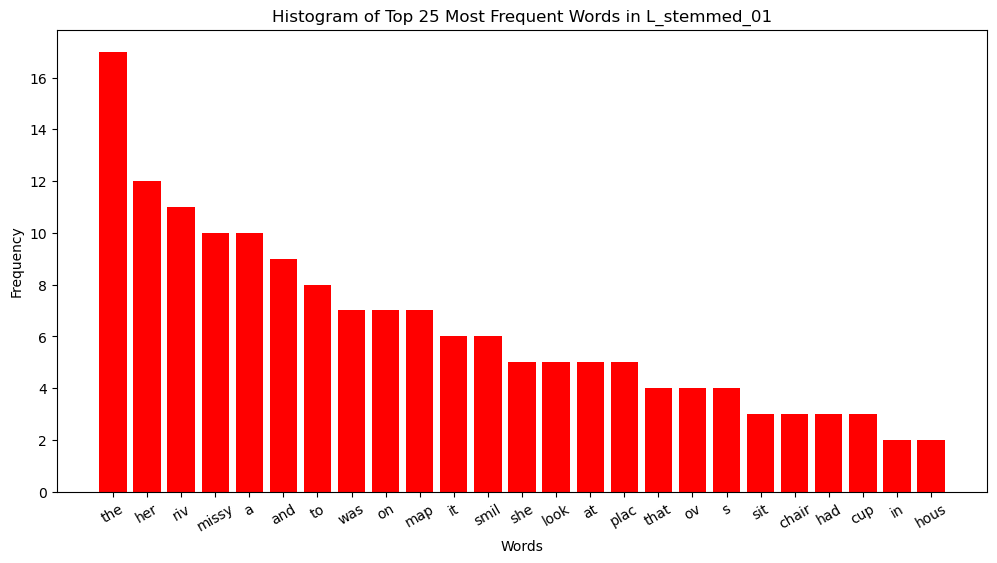

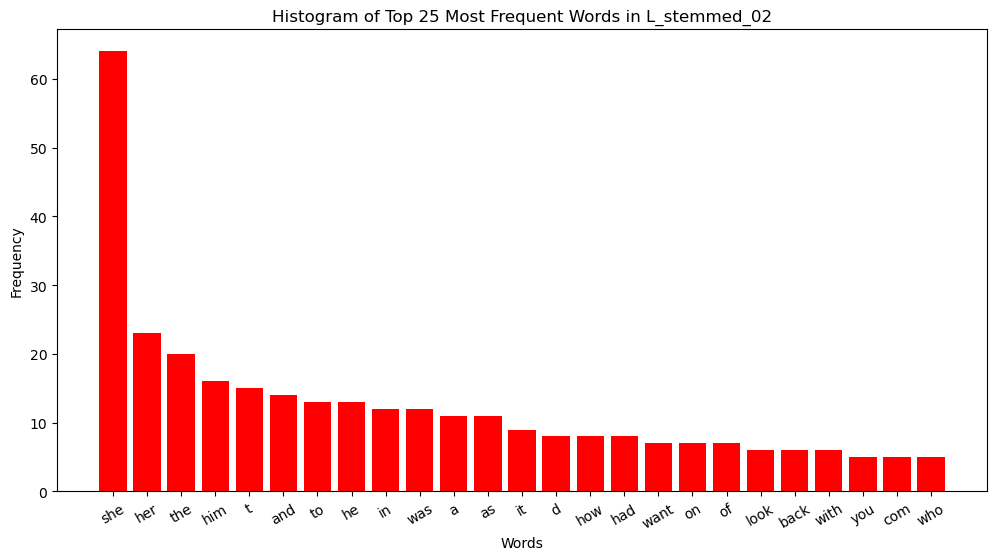

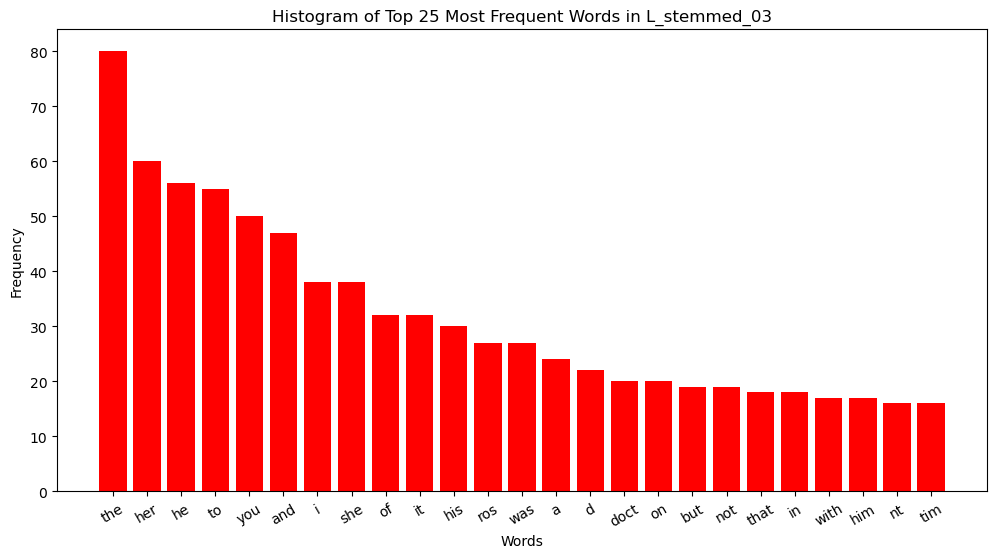

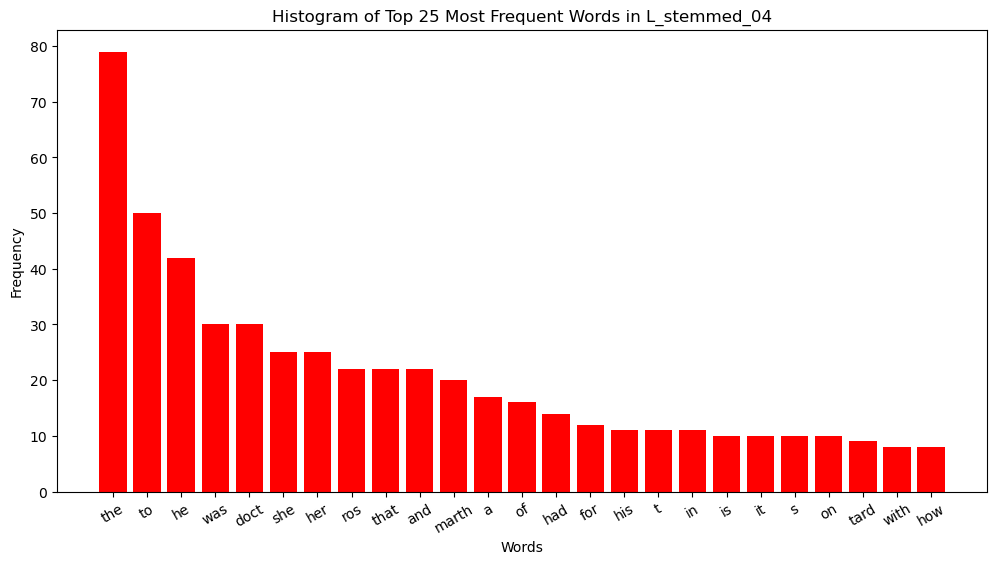

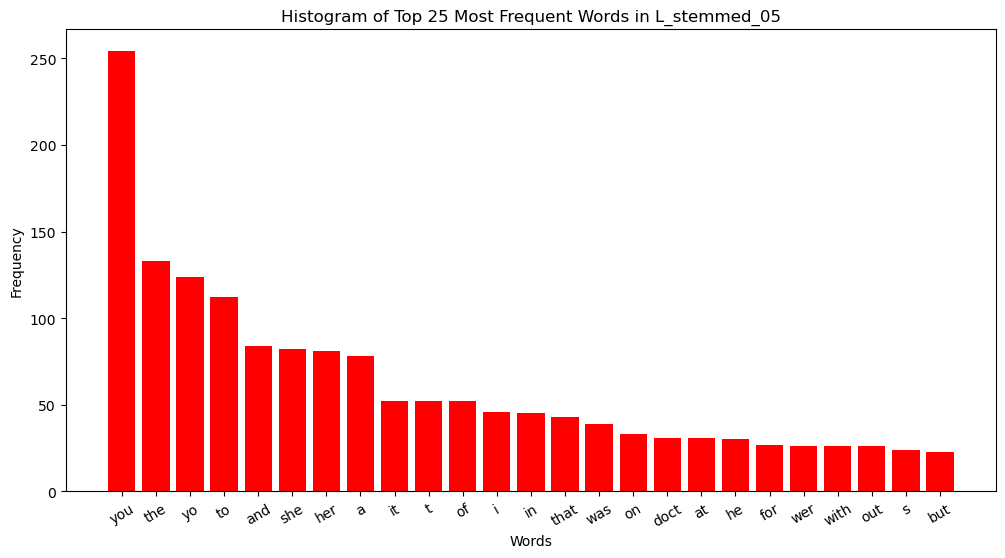

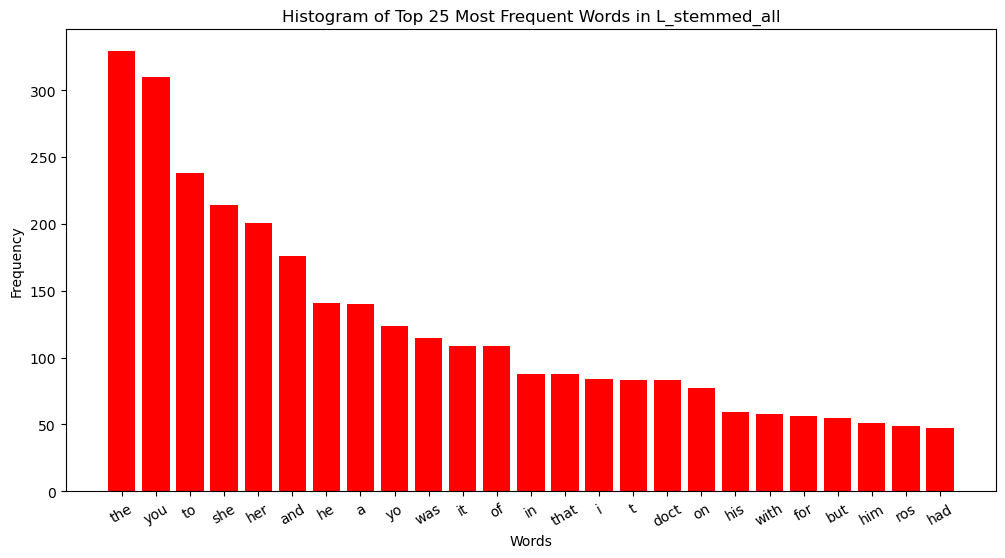

In [309]:
top25words(L_stemmed_01, title='L_stemmed_01')
top25words(L_stemmed_02, title='L_stemmed_02')
top25words(L_stemmed_03, title='L_stemmed_03')
top25words(L_stemmed_04, title='L_stemmed_04')
top25words(L_stemmed_05, title='L_stemmed_05')
top25words(L_stemmed_all, title='L_stemmed_all')

### 3.1 Cleaning Tom Sawyer by Mark Twain, English

In [311]:
#function to remove extra text from .txt file
def remove_text1(text):
    beginning = '1876.'
    ending = '*** END OF THE PROJECT GUTENBERG EBOOK THE ADVENTURES OF TOM SAWYER, COMPLETE ***'

    return text.split(beginning, 1)[1].split(ending,1)[0]

In [312]:
just_english_text = remove_text1(MT_English)
cleaned_english = clean_text(word_tokenize(just_english_text))
print(clean_text(word_tokenize(just_english_text)))

['chapter', 'i', 'tom', 'no', 'answer', 'tom', 'no', 'answer', 'what', 's', 'gone', 'with', 'that', 'boy', 'i', 'wonder', 'you', 'tom', 'no', 'answer', 'the', 'old', 'lady', 'pulled', 'her', 'spectacles', 'down', 'and', 'looked', 'over', 'them', 'about', 'the', 'room', 'then', 'she', 'put', 'them', 'up', 'and', 'looked', 'out', 'under', 'them', 'she', 'seldom', 'or', 'never', 'looked', 'through', 'them', 'for', 'so', 'small', 'a', 'thing', 'as', 'a', 'boy', 'they', 'were', 'her', 'state', 'pair', 'the', 'pride', 'of', 'her', 'heart', 'and', 'were', 'built', 'for', 'style', 'not', 'service—she', 'could', 'have', 'seen', 'through', 'a', 'pair', 'of', 'stovelids', 'just', 'as', 'well', 'she', 'looked', 'perplexed', 'for', 'a', 'moment', 'and', 'then', 'said', 'not', 'fiercely', 'but', 'still', 'loud', 'enough', 'for', 'the', 'furniture', 'to', 'hear', 'well', 'i', 'lay', 'if', 'i', 'get', 'hold', 'of', 'you', 'i', 'll—', 'she', 'did', 'not', 'finish', 'for', 'by', 'this', 'time', 'she', '

### 3.2 Cleaning Tom Sawyer by Mark Twain, Dutch

In [316]:
def remove_text2(text):
    beginning = 'Boek-, Courant- en Steendrukkerij G. J. Thieme, Nijmegen'
    ending = "End of Project Gutenberg's De Lotgevallen van Tom Sawyer, by Mark Twain"

    return text.split(beginning, 1)[1].split(ending,1)[0]

In [317]:
just_dutch_text = remove_text2(MT_Dutch)
cleaned_dutch = clean_text(word_tokenize(just_dutch_text))
print(clean_text(word_tokenize(just_dutch_text)))

['hoofdstuk', 'i', 'tom', 'geen', 'antwoord', 'tom', 'geen', 'antwoord', 'waar', 'zou', 'die', 'drommelsche', 'jongen', 'toch', 'zitten', 'hoor', 'je', 'me', 'niet', 'tom', 'de', 'oude', 'dame', 'die', 'deze', 'woorden', 'sprak', 'trok', 'haar', 'bril', 'naar', 'beneden', 'om', 'er', 'overheen', 'te', 'kijken', 'daarna', 'duwde', 'zij', 'hem', 'naar', 'boven', 'om', 'er', 'onderdoor', 'te', 'kijken', 'zelden', 'of', 'nooit', 'gebruikte', 'zij', 'hem', 'om', 'er', 'door', 'te', 'kijken', 'althans', 'niet', 'naar', 'een', 'zoo', 'onbeduidend', 'voorwerp', 'als', 'een', 'kleine', 'jongen', 'immers', 'haar', 'bril', 'was', 'haar', 'roem', 'de', 'trots', 'van', 'haar', 'hart', 'en', 'zij', 'had', 'hem', 'gekocht', 'om', 'ontzag', 'in', 'te', 'boezemen', 'niet', 'om', 'dienst', 'te', 'doen', 'voor', 'hare', 'oogen', 'toch', 'kon', 'zij', 'evengoed', 'een', 'deksel', 'van', 'een', 'sauspan', 'genomen', 'hebben', 'een', 'oogenblik', 'zag', 'zij', 'onthutst', 'in', 'het', 'rond', 'en', 'zeide',

### 3.3 Cleaning Tom Sawyer by Mark Twain, German

In [321]:
def remove_text3(text):
    beginning = 'Erstes Kapitel.'
    ending = '*** END OF THE PROJECT GUTENBERG EBOOK DIE ABENTEUER TOM SAWYERS ***'

    return text.split(beginning, 1)[1].split(ending,1)[0]

In [324]:
just_german_text = remove_text3(MT_German)
cleaned_german = clean_text(word_tokenize(just_german_text))
print(clean_text(word_tokenize(just_german_text)))

['tom', 'keine', 'antwort', 'tom', 'alles', 'still', 'soll', 'mich', 'doch', 'wundern', 'wo', 'der', 'bengel', 'wieder', 'steckt', 'tom', 'die', 'alte', 'dame', 'schob', 'ihre', 'brille', 'hinunter', 'und', 'schaute', 'darüber', 'hinweg', 'dann', 'schob', 'sie', 'sie', 'auf', 'die', 'stirn', 'und', 'schaute', 'darunter', 'weg', 'selten', 'oder', 'nie', 'schaute', 'sie', 'nach', 'einem', 'so', 'kleinen', 'ding', 'wie', 'ein', 'knabe', 'ist', 'durch', 'die', 'gläser', 'dieser', 'ihrer', 'staatsbrille', 'die', 'der', 'stolz', 'ihres', 'herzens', 'war', 'und', 'mehr', 'stilvoll', 'als', 'brauchbar', 'sie', 'würde', 'durch', 'ein', 'paar', 'herdringe', 'ebensoviel', 'gesehen', 'haben', 'unruhig', 'hielt', 'sie', 'einen', 'augenblick', 'umschau', 'und', 'sagte', 'nicht', 'gerade', 'erzürnt', 'aber', 'doch', 'immer', 'laut', 'genug', 'um', 'im', 'ganzen', 'zimmer', 'gehört', 'zu', 'werden', 'ich', 'werde', 'strenges', 'gericht', 'halten', 'müssen', 'wenn', 'ich', 'dich', 'erwische', 'ich', 'w

### 3.4 spaCy POS tagging

In [326]:
#loading spaCy models
nlp_eng = spacy.load("en_core_web_sm")
nlp_ger = spacy.load("de_core_news_sm")
nlp_dut = spacy.load("nl_core_news_sm")

#turning the list of cleaned words into a string
english_string = ' '.join(cleaned_english)
german_string = ' '.join(cleaned_german)
dutch_string = ' '.join(cleaned_dutch)

#processing text
doc_eng = nlp_eng(english_string)
doc_ger = nlp_ger(german_string)
doc_dut = nlp_dut(dutch_string)

In [328]:
eng_pos_counts = Counter(token.pos_ for token in doc_eng)
print('English words pos', eng_pos_counts)

English words pos Counter({'NOUN': 12669, 'VERB': 11634, 'PRON': 10141, 'ADP': 7242, 'DET': 6900, 'ADV': 4852, 'ADJ': 4427, 'AUX': 3938, 'CCONJ': 3843, 'PROPN': 2445, 'SCONJ': 1883, 'PART': 1716, 'PUNCT': 873, 'INTJ': 528, 'NUM': 495, 'X': 52})


In [329]:
ger_pos_counts = Counter(token.pos_ for token in doc_ger)
print('German words pos', ger_pos_counts)

German words pos Counter({'NOUN': 10352, 'ADV': 10022, 'PRON': 9005, 'VERB': 8828, 'DET': 7537, 'ADP': 5775, 'AUX': 4128, 'ADJ': 3388, 'CCONJ': 2864, 'PROPN': 2087, 'PART': 1646, 'SCONJ': 1084, 'X': 387, 'NUM': 301, 'PUNCT': 9, 'INTJ': 3})


In [330]:
dut_pos_counts = Counter(token.pos_ for token in doc_dut)
print('Dutch words pos', dut_pos_counts)

Dutch words pos Counter({'NOUN': 12405, 'VERB': 11574, 'PRON': 9994, 'ADP': 8851, 'DET': 7051, 'ADV': 6230, 'ADJ': 5276, 'AUX': 4177, 'CCONJ': 3463, 'PROPN': 2539, 'SCONJ': 2055, 'NUM': 397, 'SYM': 210, 'INTJ': 173, 'X': 12, 'PUNCT': 2})


# Part 2: Named Entity Recognition using spaCy

## 1.1 Assigning variables

In [337]:
doc1 = nlp_eng(file_01)
doc2 = nlp_eng(file_02)
doc3 = nlp_eng(file_03)
doc4 = nlp_eng(file_04)
doc5 = nlp_eng(file_05)

## 1.2 Visualised file_01

In [339]:
displacy.render(doc1, style="ent")

## 1.3 Visualised file_02

In [343]:
displacy.render(doc2, style="ent")

## 1.4 Visualised file_03

In [346]:
displacy.render(doc3, style="ent")

## 1.5 Visualised file_04

In [349]:
displacy.render(doc4, style="ent")

## 1.6 Visualised file_05

In [352]:
displacy.render(doc5, style="ent")